### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics tools
import scikit_posthocs as posthocs
from scipy import stats

In [3]:
pd.set_option('display.max.columns',None)
sns.set_palette(palette='Dark2')

### Loading the dataset

In [4]:
hr_df = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition-Modified-xlx.csv')

In [5]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Rename some categorical values to meaningful names

**Education** - 1. 'Below College'; 2. 'College'; 3. 'Bachelor'; 4. 'Master'; 5. 'Doctor'

**EnvironmentSatisfaction** - 1. 'Low'; 2. 'Medium'; 3. 'High'; 4. 'Very High'

**JobInvolvement** - 1. 'Low'; 2. 'Medium'; 3. 'High'; 4. 'Very High'

**JobSatisfaction** - 1. 'Low'; 2. 'Medium'; 3. 'High'; 4. 'Very High'

**PerformanceRating** - 1. 'Low'; 2. 'Good'; 3. 'Excellent'; 4. 'Outstanding'

**RelationshipSatisfaction** - 1. 'Low'; 2. 'Medium'; 3. 'High'; 4. 'Very High'

**WorkLifeBalance** - 1. 'Bad'; 2. 'Good'; 3. 'Better'; 4. 'Best'

In [5]:
to_rename_cat = {
    'Education': {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'},
    'JobLevel': {1: 'Entry Level', 2: 'Junior Level', 3: 'Mid Level', 4: 'Senior Level', 5: 'Executive Level'},
}

to_rename_num = {
    'EnvironmentSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobInvolvement': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'JobSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'PerformanceRating': {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'},
    'RelationshipSatisfaction': {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'},
    'WorkLifeBalance': {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
}
    
for field, replace_values in to_rename_cat.items():
    hr_df[field] = hr_df[field].replace(replace_values)

for field, replace_values in to_rename_num.items():
    hr_df[f'{field}_num'] = hr_df[field].copy() # Keep the numerical version in field_num column
    hr_df[field] = hr_df[field].replace(replace_values)

In [6]:
hr_df = hr_df.reindex(sorted(hr_df.columns), axis=1)
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,EnvironmentSatisfaction_num,Gender,HourlyRate,JobInvolvement,JobInvolvement_num,JobLevel,JobRole,JobSatisfaction,JobSatisfaction_num,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,PerformanceRating_num,RelationshipSatisfaction,RelationshipSatisfaction_num,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance_num,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,2,Female,94,High,3,Junior Level,Sales Executive,Very High,4,Single,5993,19479,8,Yes,11,Excellent,3,Low,1,0,8,0,Bad,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,3,Male,61,Medium,2,Junior Level,Research Scientist,Medium,2,Married,5130,24907,1,No,23,Outstanding,4,Very High,4,1,10,3,Better,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,4,Male,92,Medium,2,Entry Level,Laboratory Technician,High,3,Single,2090,2396,6,Yes,15,Excellent,3,Medium,2,0,7,3,Better,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,4,Female,56,High,3,Entry Level,Research Scientist,High,3,Married,2909,23159,1,Yes,11,Excellent,3,High,3,0,8,3,Better,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,1,Male,40,High,3,Entry Level,Laboratory Technician,Medium,2,Married,3468,16632,9,No,12,Excellent,3,Very High,4,1,6,3,Better,3,2,2,2,2


### Numerical description of the data

In [9]:
round(hr_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.0,7.0,14.00,29.0
EnvironmentSatisfaction_num,1470.0,2.72,1.09,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.0,66.0,83.75,100.0
JobInvolvement_num,1470.0,2.73,0.71,1.0,2.0,3.0,3.00,4.0
JobSatisfaction_num,1470.0,2.73,1.10,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.10,7117.79,2094.0,8047.0,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.0,2.0,4.00,9.0


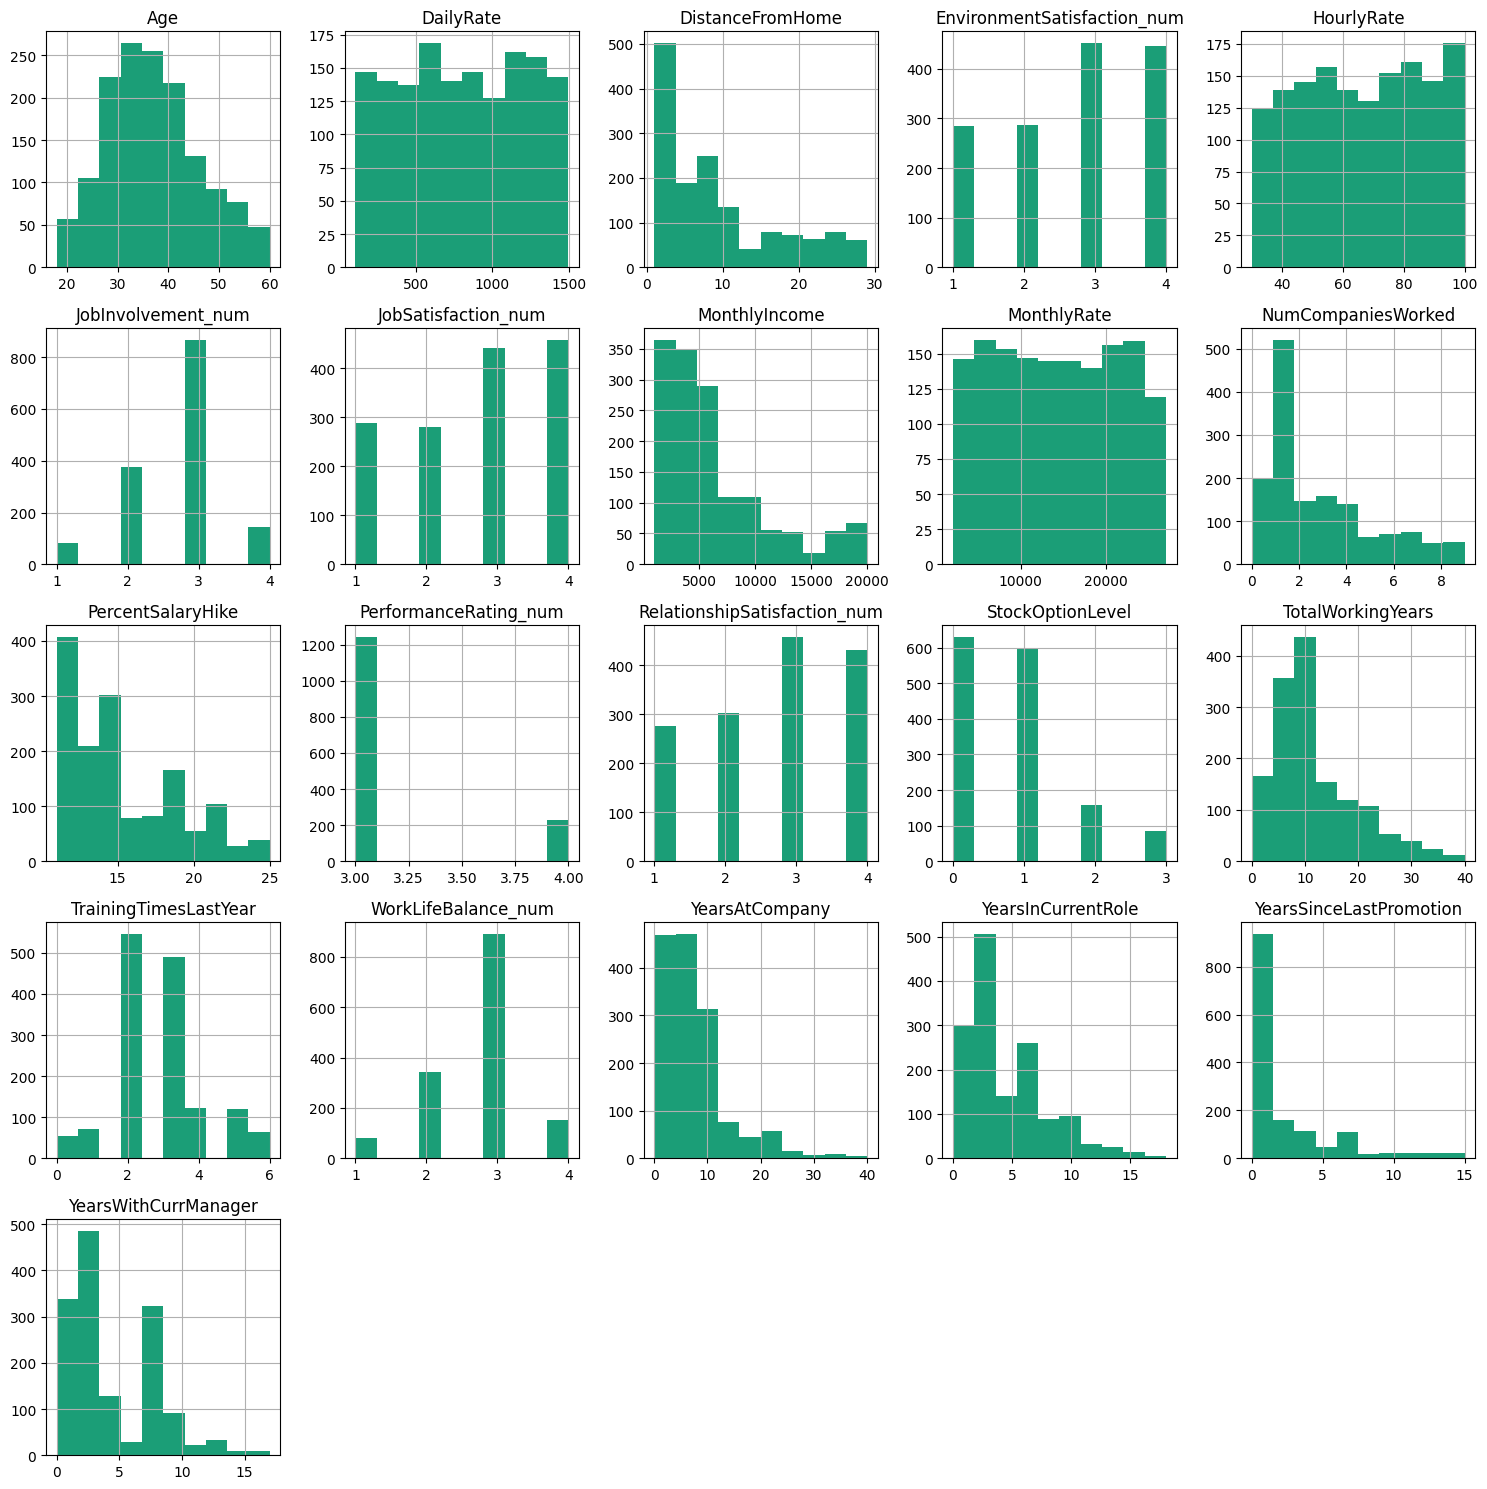

In [10]:
hr_df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

#### Hourly, daily, and monthly rate are poor variables for this analysis

**Here's why:**

* Usually HR law requires hourly employees working over 40 hours in a week to be paid an overtime rate. While salary employees are paid a consistent amount regardless of the number of hours worked.
* Based on the distributions of these columns it seems hourly rates were 'calculated' for salary employees. However, this calculations is useless without the number of hours the employee is actually working.
* The rate columns provide a false representation and could therefore misrepresent it's relationship with variables such as job satisfaction.
 
In this analysis we should drop the hourly, daily, and monthly rates, and focus on the monthly income instead.

If needed, we could calculate annual and weekly incomes using the following equations:
* Annual income= monthly income amount * 12 months
* Weekly income= Annual amount / 52 weeks

In [62]:
hr_df = hr_df.drop(columns=['HourlyRate', 'DailyRate', 'MonthlyRate'])

In [12]:
hr_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,EnvironmentSatisfaction_num,Gender,JobInvolvement,JobInvolvement_num,JobLevel,JobRole,JobSatisfaction,JobSatisfaction_num,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,PerformanceRating_num,RelationshipSatisfaction,RelationshipSatisfaction_num,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance_num,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,Medium,2,Female,High,3,Junior Level,Sales Executive,Very High,4,Single,5993,8,Yes,11,Excellent,3,Low,1,0,8,0,Bad,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below College,Life Sciences,High,3,Male,Medium,2,Junior Level,Research Scientist,Medium,2,Married,5130,1,No,23,Outstanding,4,Very High,4,1,10,3,Better,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,Very High,4,Male,Medium,2,Entry Level,Laboratory Technician,High,3,Single,2090,6,Yes,15,Excellent,3,Medium,2,0,7,3,Better,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,Very High,4,Female,High,3,Entry Level,Research Scientist,High,3,Married,2909,1,Yes,11,Excellent,3,High,3,0,8,3,Better,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below College,Medical,Low,1,Male,High,3,Entry Level,Laboratory Technician,Medium,2,Married,3468,9,No,12,Excellent,3,Very High,4,1,6,3,Better,3,2,2,2,2


In [13]:
hr_df.describe(include=['object']).T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


### Save modified dataset

In [14]:
# hr_df.to_csv('./data/cleaned.csv', encoding='utf-8', index=False)

### Correlation matrix

In [63]:
corr_hr_df = hr_df.copy()
corr_hr_df['Attrition'] = corr_hr_df['Attrition'].replace({'Yes': 1, 'No': 0})

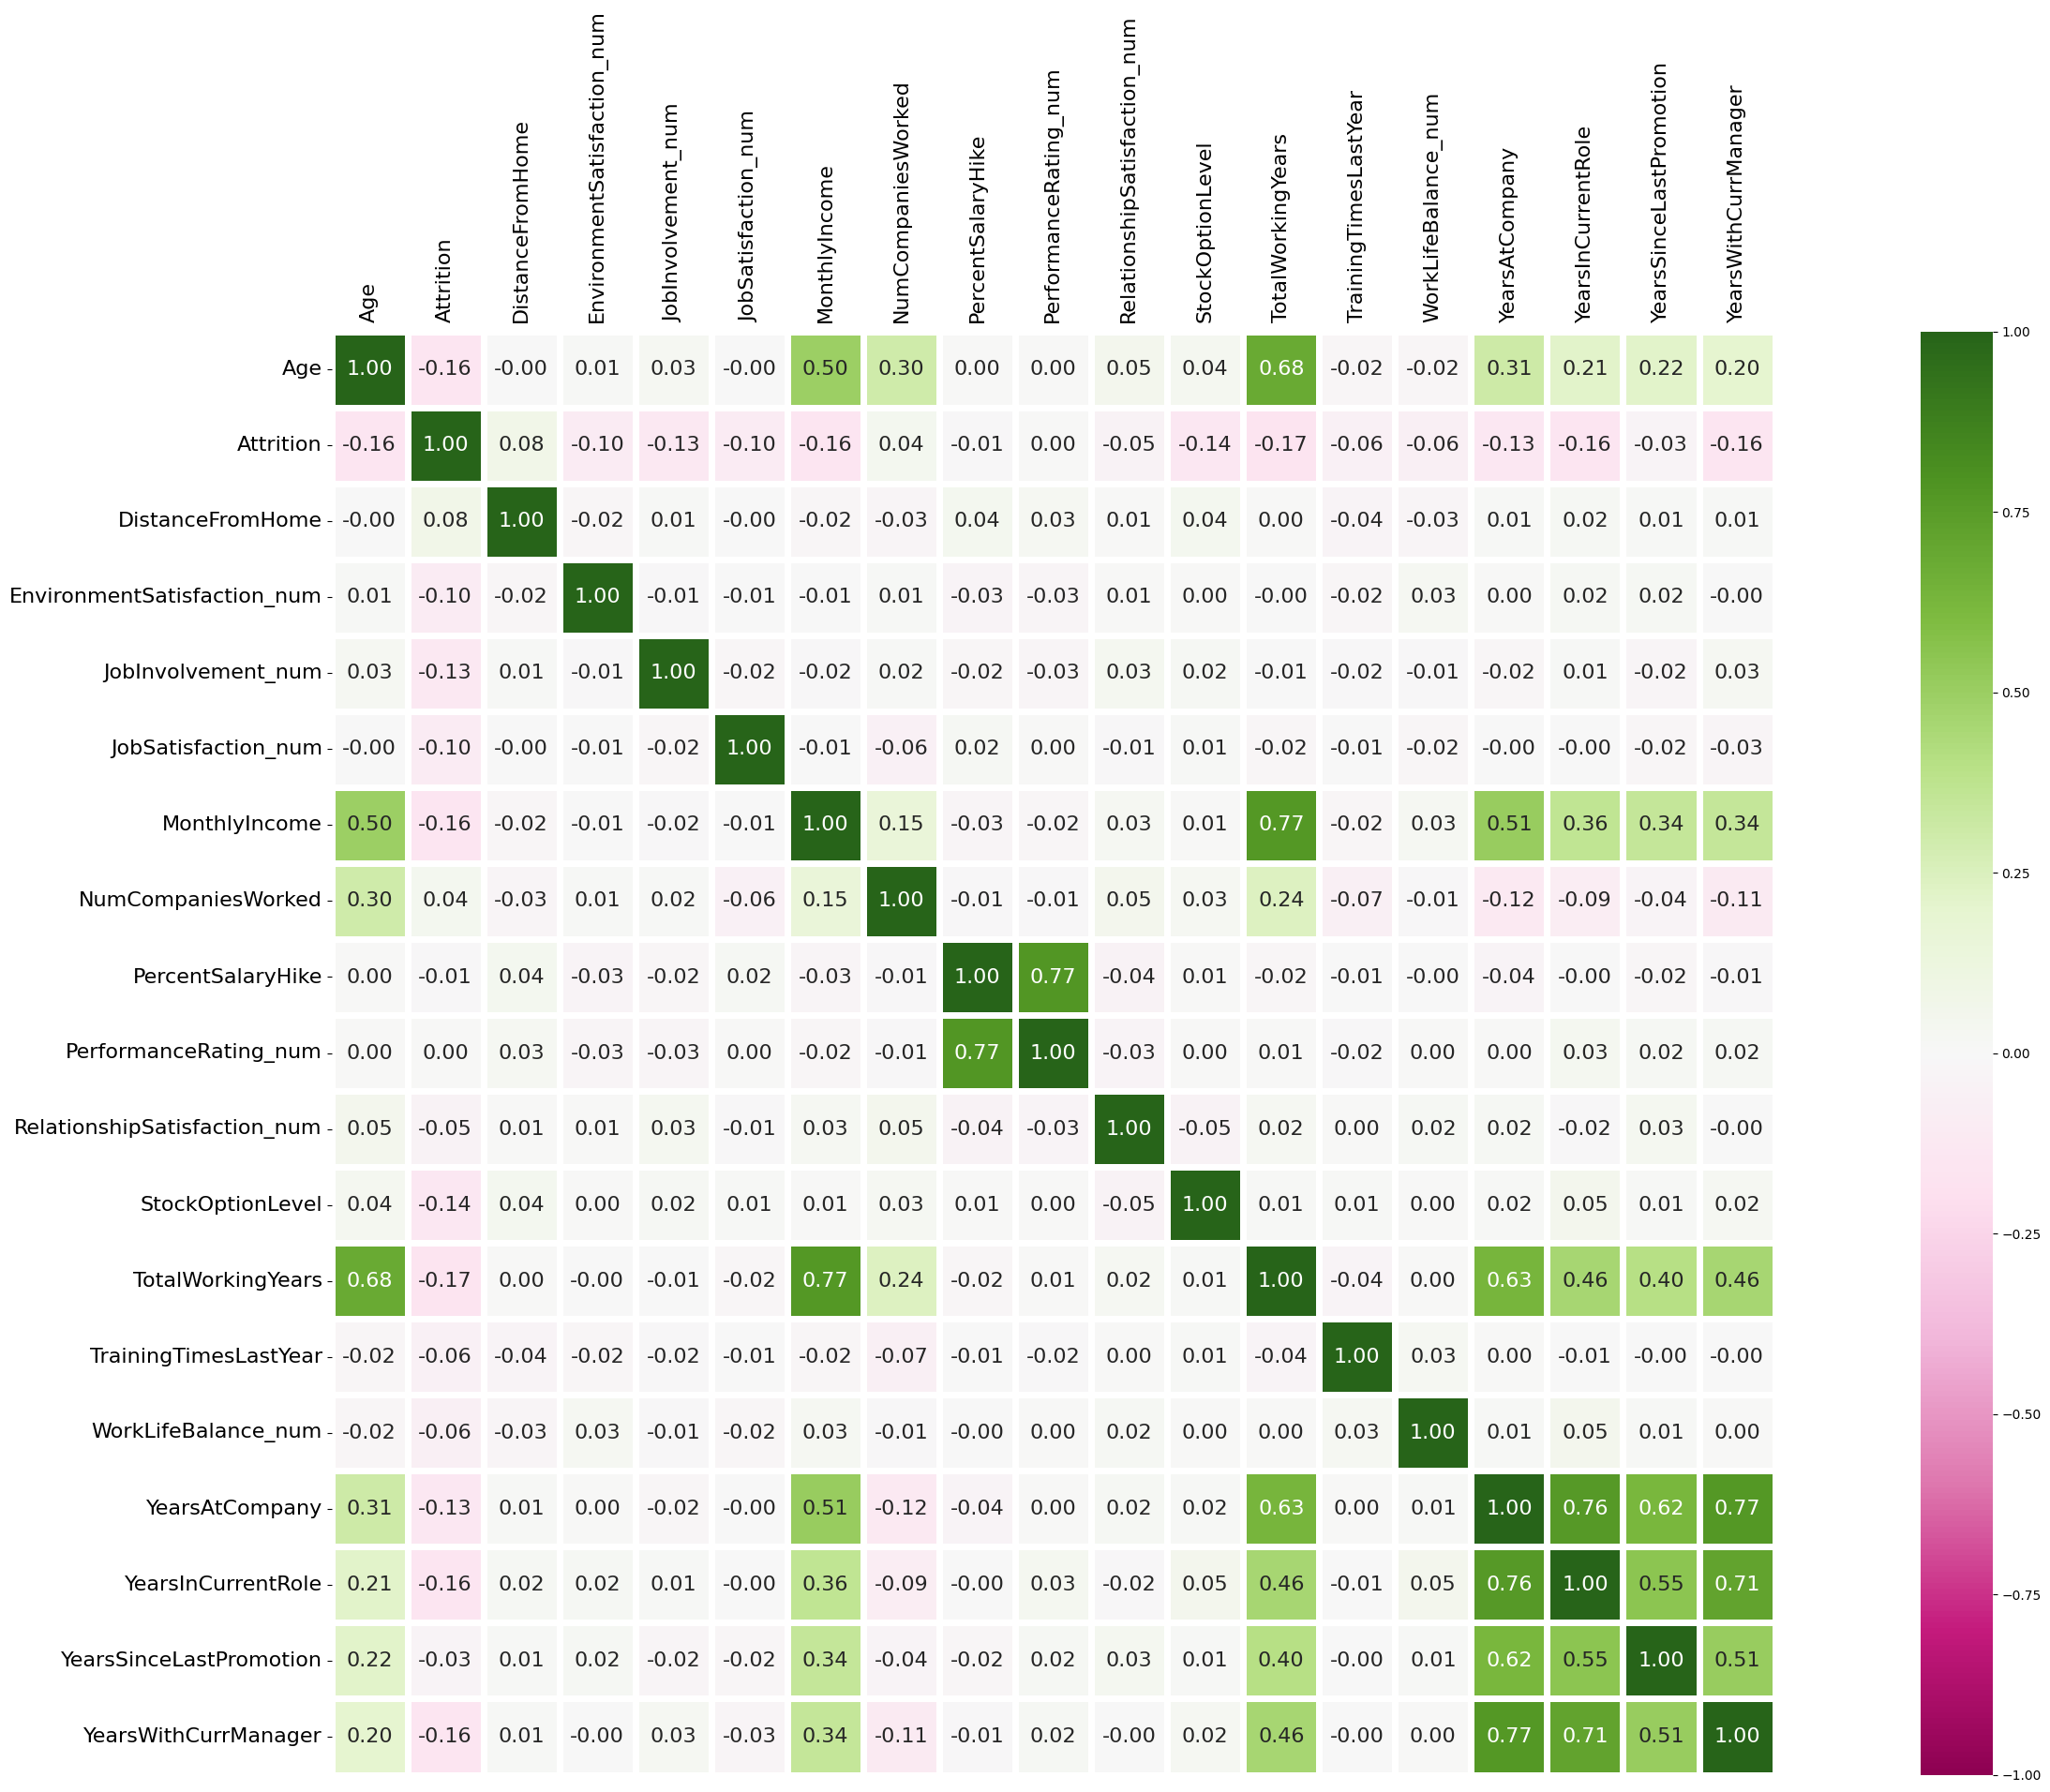

In [16]:
plt.figure(figsize=(40,20))
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

sns.heatmap(corr_hr_df.select_dtypes(np.number).corr(),vmin=-1, vmax=1, linewidths=5, fmt='.2f',annot=True, square=True,annot_kws={'size': 16}, cmap='PiYG')
plt.show()

In [17]:
correlation_matrix = corr_hr_df.select_dtypes(np.number).corrwith(corr_hr_df['Attrition'])
correlation_matrix.sort_values(ascending=False)

Attrition                       1.000000
DistanceFromHome                0.077924
NumCompaniesWorked              0.043494
PerformanceRating_num           0.002889
PercentSalaryHike              -0.013478
YearsSinceLastPromotion        -0.033019
RelationshipSatisfaction_num   -0.045872
TrainingTimesLastYear          -0.059478
WorkLifeBalance_num            -0.063939
EnvironmentSatisfaction_num    -0.103369
JobSatisfaction_num            -0.103481
JobInvolvement_num             -0.130016
YearsAtCompany                 -0.134392
StockOptionLevel               -0.137145
YearsWithCurrManager           -0.156199
Age                            -0.159205
MonthlyIncome                  -0.159840
YearsInCurrentRole             -0.160545
TotalWorkingYears              -0.171063
dtype: float64

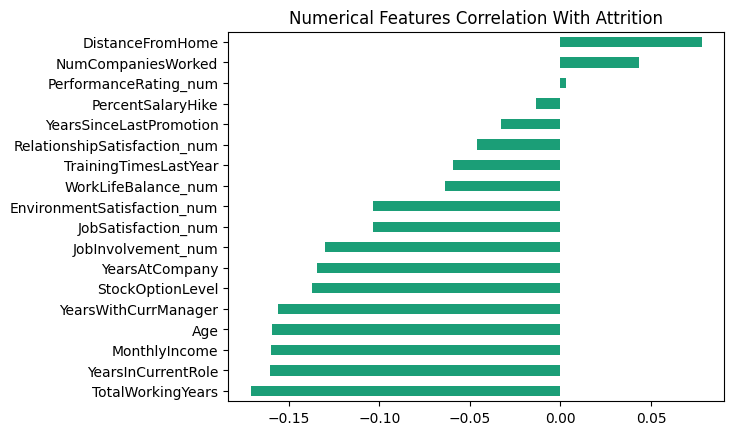

In [64]:
corr_hr_df.drop('Attrition', axis=1) \
    .select_dtypes(np.number) \
    .corrwith(corr_hr_df['Attrition']) \
    .sort_values() \
    .plot(kind='barh', title="Numerical Features Correlation With Attrition")
plt.show()

In [18]:
correlation_matrix = corr_hr_df.select_dtypes(np.number).corr()

high_correlation_mask = correlation_matrix >= 0.6
highly_correlated_features = []


for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        v = correlation_matrix.loc[feature, correlated_feature]
        if feature != correlated_feature and (correlated_feature, feature, v) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature, v))
            
highly_correlated_features = sorted(highly_correlated_features, key=lambda x: x[2], reverse=True)

print('Highly correlated features:')
for f1, f2, v in highly_correlated_features:
    print(f'{f1} and {f2} with value {v:.2f}')

Highly correlated features:
PercentSalaryHike and PerformanceRating_num with value 0.77
MonthlyIncome and TotalWorkingYears with value 0.77
YearsAtCompany and YearsWithCurrManager with value 0.77
YearsAtCompany and YearsInCurrentRole with value 0.76
YearsInCurrentRole and YearsWithCurrManager with value 0.71
Age and TotalWorkingYears with value 0.68
TotalWorkingYears and YearsAtCompany with value 0.63
YearsAtCompany and YearsSinceLastPromotion with value 0.62


Correlation between numerical features shows us that time-related features are the most correlated, which means they are all tightly related

### Feature Importance

Utilizing statistical methods, I will get more understanding on what features are more important for attrition 

In this section we will utilize the following statistical tests:
* ANOVA for numerical features
* Chi-square for two categorical features
* T-test in case we want to test only two groups of numerical features
* Post-hoc. If ANOVA indicates significant differences, we can perform post-hoc tests like Tukey's HSD to identify which specific groups differ significantly.

#### Supporting functions

In [76]:
fi_hr_df = hr_df.copy()
num_cols = fi_hr_df.select_dtypes(np.number).columns
cat_cols = fi_hr_df.select_dtypes("object").columns

In [40]:
def t_test(num_column: str, target: str='Attrition', df=fi_hr_df):
    '''
    T-ttest betwen TWO groups in column with value
    As a result we return t-statistic value, critical value, and p-value
    Critical value is taken as PPF to cut both ends from our critical region
    '''
    uniq = df[target].unique()
    if len(uniq) > 2:
        raise Exception('Too many groups')
    print(f'Groups: {uniq}')
    a = df[df[target]==uniq[0]][num_column]
    b = df[df[target]==uniq[1]][num_column]
    res = stats.ttest_ind(a, b)
    return res.statistic, stats.t.ppf(1-.05/2, res.df), res.pvalue

In [41]:
def chi_sqrd(cat_column: str, target: str='Attrition', df=fi_hr_df):
    '''
    Chi-square test between two given categorical features
    As a result we return chi-statistic value, chi-critical value, and p-value
    '''
    contingency_table = pd.crosstab(df[cat_column], df[target])
    chi2, p_value, deg, _ = stats.chi2_contingency(contingency_table)
    chi_crit = stats.chi2.ppf(0.95, deg)
    return chi2, chi_crit, p_value

In [42]:
def chi_sqrd_all(target: str = "Attrition", df=fi_hr_df):
    '''
    Apply Chi-square test between all categorical features and a target categorical feature
    As a result we return chi-statistic value, chi-critical value, and p-value
    '''
    chi2_values = {}
    chi2_crit_values = {}
    p_values = {}

    for cat_col in cat_cols:
        if cat_col == target:
            continue
        chi2_values[cat_col], chi2_crit_values[cat_col], p_values[cat_col] = chi_sqrd(cat_col, target, df)
    return chi2_values, chi2_crit_values, p_values

In [43]:
def anova(column: str, target: str='Attrition', df=fi_hr_df):
    '''
    ANOVA for single column by a target categorical feature
    As a result we return f-score value, f-critical value, and p-value
    '''
    groups = {}
    for cat in df[target].unique():
        groups[cat] = df[df[target] == cat][column]
    f_stat, p_val = stats.f_oneway(*groups.values())
    
    dof_between = len(groups) - 1
    dof_within = len(df) - len(groups)
    f_crit = stats.f.ppf(1-0.05, dof_between, dof_within)
    
    return f_stat, f_crit, p_val


In [44]:
def anova_all(target: str='Attrition', df=fi_hr_df):
    '''Apply ANOVA test to all numerical values of groups based on given cat feature'''
    f_scores = {}
    f_crit = {}
    p_values = {}

    for num_col in num_cols:
        if num_col == target:
            continue
        f_scores[num_col], f_crit[num_col], p_values[num_col] = anova(num_col, target, df)
    return f_scores, f_crit, p_values

In [45]:
def anova_all_for_num(num_target: str, df=fi_hr_df):
    '''Apply ANOVA test to all categorical values based on given numerical feature'''
    f_scores = {}
    f_crit = {}
    p_values = {}

    for cat_col in cat_cols:
        f_scores[cat_col], f_crit[cat_col], p_values[cat_col] = anova(num_target, cat_col, df)
    return f_scores, f_crit, p_values

In [23]:
def plot_p_values(p_values: dict[str, float], title=''):
    plt.figure(figsize=(6,7))
    
    sorted_dict = dict(sorted(p_values.items(), key=lambda item: item[1]))
    keys, values = list(sorted_dict.keys()), list(sorted_dict.values())
    
    sns.barplot(y=keys, x=values)
    axes = plt.gca()
    axes.set_xlim(0.0, 1.0)
    plt.title(title)
    plt.axvline(x=.05, color='red', linestyle='--', label='P-value = 0.05')
    plt.legend()

    for index,value in enumerate(values):
        plt.text(value, index, round(value,3), va='center')
        
    plt.show()

In [24]:
def plot_p_values_with_stat(
    p_values: dict[str, float], 
    stat_values: dict[str, float], 
    crit_values: dict[str, float],
    title=''
):
    plt.figure(figsize=(6,7))
    
    sorted_dict = dict(sorted(p_values.items(), key=lambda item: item[1]))
    keys, values = list(sorted_dict.keys()), list(sorted_dict.values())
    
    sns.barplot(y=keys, x=values)
    axes = plt.gca()
    axes.set_xlim(0.0, 1.0)
    plt.title(title)
    plt.axvline(x=.05, color='red', linestyle='--', label='P-value = 0.05')
    plt.legend()

    for index,value in enumerate(values):
        plt.text(value, index, round(value,3), va='center')
        
    for key in keys:
        if abs(stat_values[key]) > abs(crit_values[key]):
            plt.text(1.07, keys.index(key), 'Stat > Crit', color='green', va='center')
        else:
            plt.text(1.07, keys.index(key), 'Stat < Crit', color='red', va='center')
        
        
    plt.show()

#### **Categorical Features**

Let's check what categorical features impact Attrition

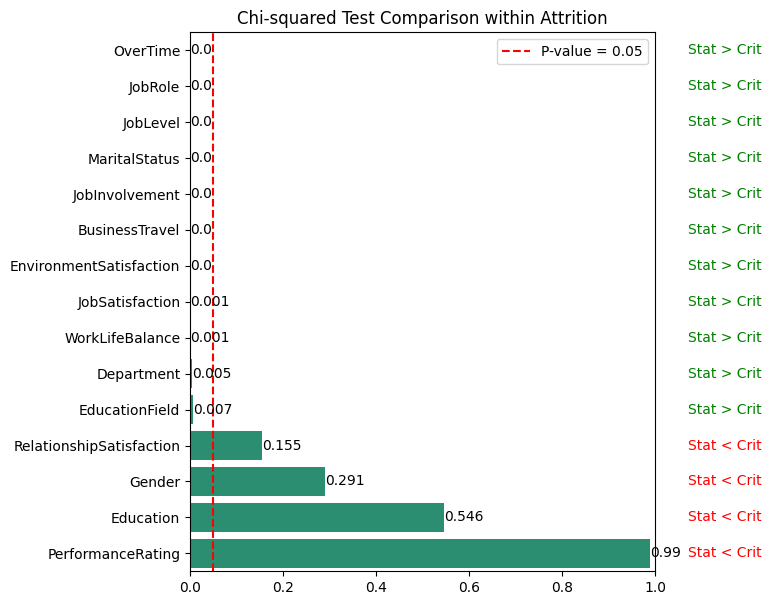

In [25]:
chi2_values_attrit, chi2_crit_attrit, chi2_p_val_attrit  = chi_sqrd_all("Attrition")
plot_p_values_with_stat(chi2_p_val_attrit, chi2_values_attrit, chi2_crit_attrit, "Chi-squared Test Comparison within Attrition")

We will double-check the correctness by looking at raw numbers of `Department` impact on `Attrition`  
**Does Department have any effect on attrition?**  

Null hypothesis $H_0$ - Department does not affect attrition

In [26]:
chi2, chi2_crit, p_value = chi_sqrd('Department')
print(chi2, chi2_crit, p_value)

10.79600732241067 5.991464547107979 0.004525606574479634


As we can see, $\chi^2 \gt \chi_{critical}^2$ and P-value is less than 0.05, we reject our hypothesis $H_0$ and that means that **department has a significant impact on attrition**

And we can say that the following categorical fields have an impact on `Attrition`

* BusinessTravel
* Department
* EducationField
* EnvironmentSatisfaction
* JobInvolvement
* JobLevel
* JobRole
* JobSatisfaction
* MaritalStatus
* OverTime
* WorkLifeBalance

We will need to take this into account while exploring data with Tableau

**BusinessTravel**

Let's explore how different BusinessTravel groups differ in numerical values

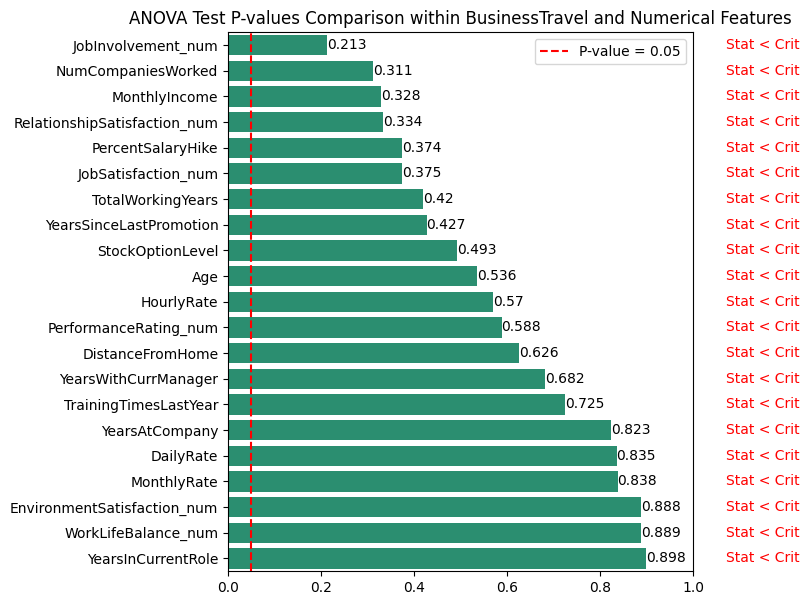

In [70]:
business_travel_anova_all = anova_all('BusinessTravel')
plot_p_values_with_stat(
    business_travel_anova_all[2], 
    business_travel_anova_all[0], 
    business_travel_anova_all[1], 
    'ANOVA Test P-values Comparison within BusinessTravel and Numerical Features'
)

And Categorical Features

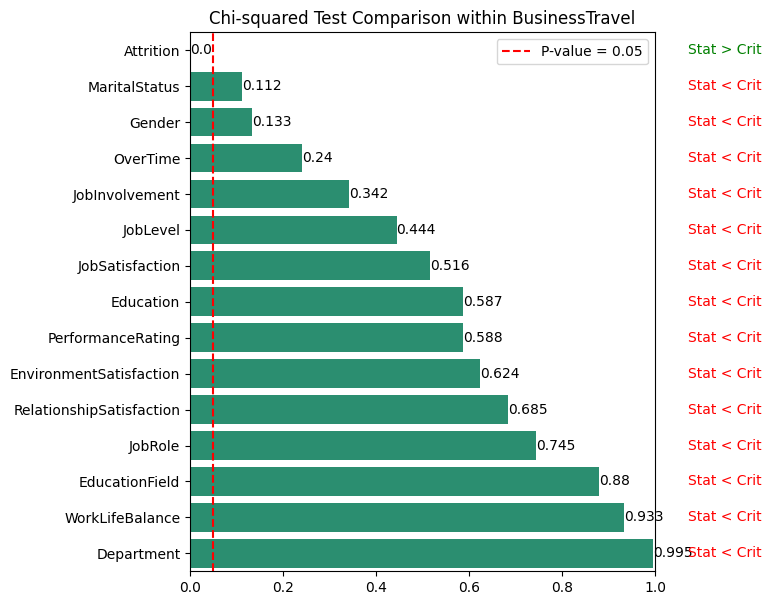

In [99]:
chi2_values_business_travel, chi2_crit_business_travel, chi2_p_val_business_travel  = chi_sqrd_all("BusinessTravel")
plot_p_values_with_stat(chi2_p_val_business_travel, chi2_values_business_travel, chi2_crit_business_travel, "Chi-squared Test Comparison within BusinessTravel")

**Department**

Let's check departments and impact from categorical features on them

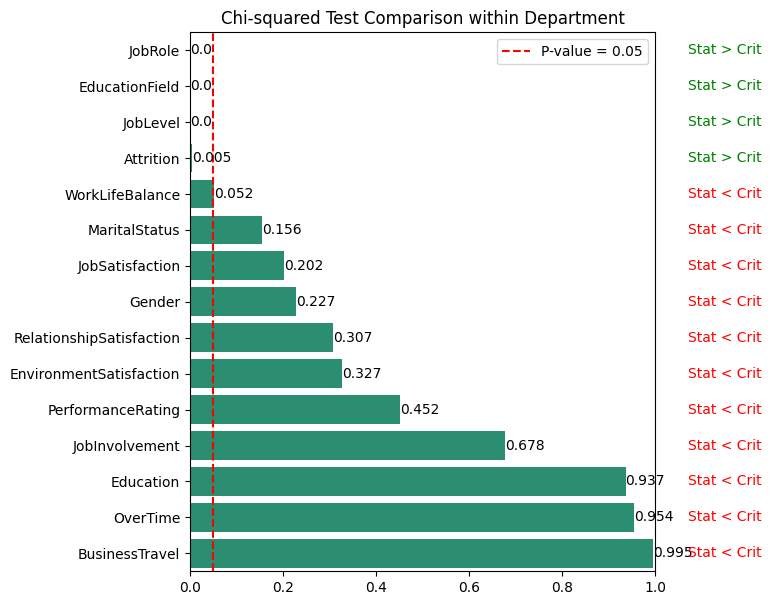

In [100]:
chi2_values_dep, chi2_crit_dep, chi2_p_val_dep  = chi_sqrd_all("Department")
plot_p_values_with_stat(chi2_p_val_dep, chi2_values_dep, chi2_crit_dep, "Chi-squared Test Comparison within Department")

But **do different departments have a difference in numerical values**?

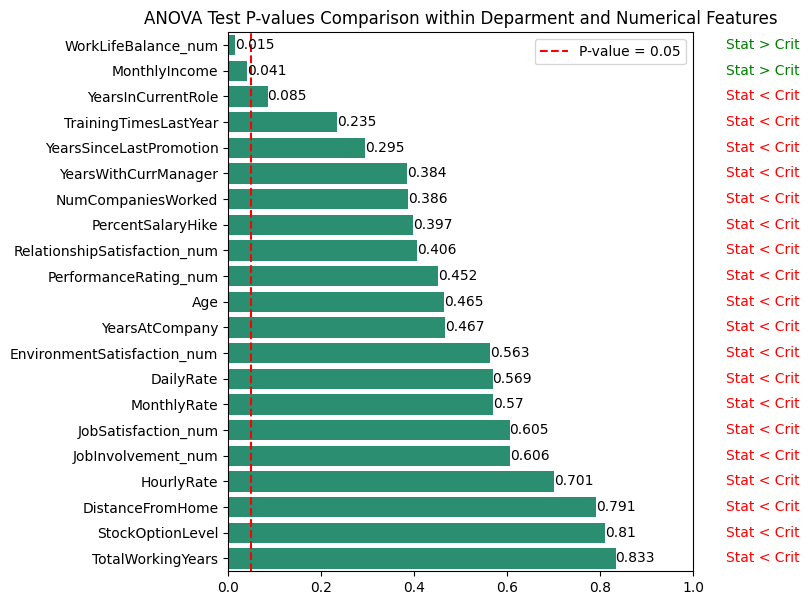

In [28]:
department_anova_all = anova_all('Department')
plot_p_values_with_stat(
    department_anova_all[2], 
    department_anova_all[0], 
    department_anova_all[1], 
    'ANOVA Test P-values Comparison within Deparment and Numerical Features'
)

As we can see, `MonthlyIncome`, `WorkLifeBalance_num` have significant difference between departments

But **which departments have significant difference in MontlyIncome**? 

We can utilize PostHoc test by T-test pairwise comparison 

In [65]:
print("MonthlyIncome in Departments")
print(posthocs.posthoc_ttest(fi_hr_df, val_col="MonthlyIncome", group_col="Department"))
print("\nMonthlyIncome in Departments within Employees that Quit")
print(posthocs.posthoc_ttest(fi_hr_df[fi_hr_df['Attrition'] == 'Yes'], val_col="MonthlyIncome", group_col="Department"))

MonthlyIncome in Departments
                           Sales  Research & Development  Human Resources
Sales                   1.000000                0.010998         0.599484
Research & Development  0.010998                1.000000         0.562536
Human Resources         0.599484                0.562536         1.000000

MonthlyIncome in Departments within Employees that Quit
                           Sales  Research & Development  Human Resources
Sales                   1.000000                0.000248         0.058054
Research & Development  0.000248                1.000000         0.699802
Human Resources         0.058054                0.699802         1.000000


In [46]:
posthocs.posthoc_ttest(fi_hr_df, val_col="WorkLifeBalance_num", group_col="Department")

,Sales,Research & Development,Human Resources
Sales,1.000000,0.024449,0.255220
Research & Development,0.024449,1.000000,0.036542
Human Resources,0.255220,0.036542,1.000000


After PostHoc analysis, we can see a **significant difference** between **Sales** and **Research & Development** departments, we need to take this into account when we continue analyzing Attrition with Tableau

**Let's look at OverTime and how it impacts on Department**

In [24]:
chi_sqrd("OverTime", "Department")

(0.09360659979986956, 5.991464547107979, 0.9542750851354225)

**OverTime**

What categorical features differ with employees who work OverTime?

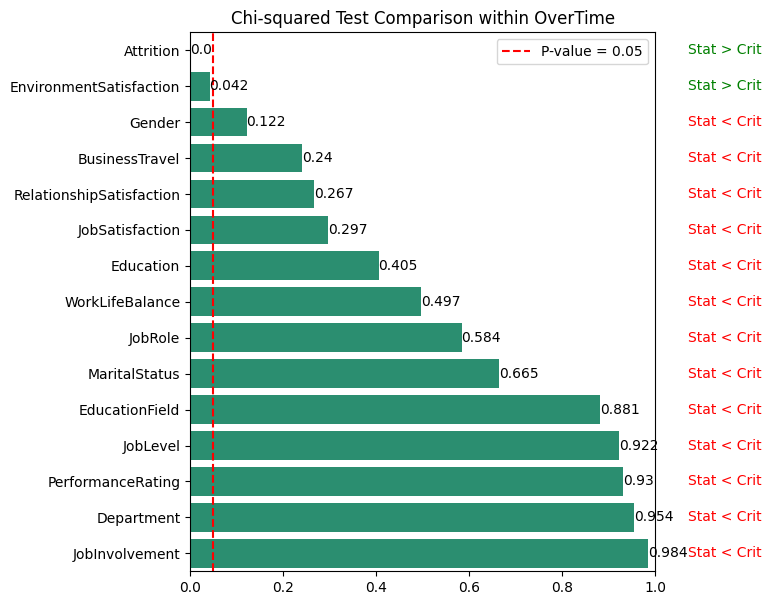

In [34]:
chi2_values_overtime, chi2_crit_overtime, chi2_p_val_overtime  = chi_sqrd_all("OverTime")
plot_p_values_with_stat(chi2_p_val_overtime, chi2_values_overtime, chi2_crit_overtime, "Chi-squared Test Comparison within OverTime")

OverTime is only impacted by EnvironmentSatisfaction 

What numerical features differ with employees who work OverTime?

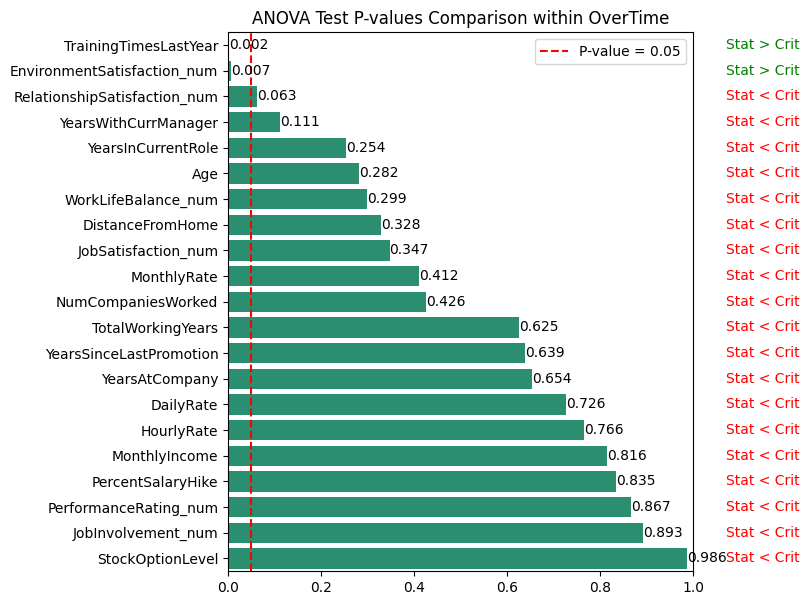

In [31]:
overtime_anova_all = anova_all('OverTime')
plot_p_values_with_stat(
    overtime_anova_all[2], 
    overtime_anova_all[0], 
    overtime_anova_all[1], 
    'ANOVA Test P-values Comparison within OverTime'
)

As we can wee EnvironmentSatisfaction differs between employees who work overtime and who don't

Another interesting thing is TrainingTimesLastYear, let's do PostHoc T-test on that.

In [69]:
print("TrainingTimesLastYear in OverTime")
print(posthocs.posthoc_ttest(fi_hr_df, val_col="TrainingTimesLastYear", group_col="OverTime"))
print("\nTrainingTimesLastYear in OverTime within Employees that Quit")
print(posthocs.posthoc_ttest(fi_hr_df[fi_hr_df['Attrition'] == 'Yes'], val_col="TrainingTimesLastYear", group_col="OverTime"))
print("\nTrainingTimesLastYear in OverTime within Employees that Stayed")
print(posthocs.posthoc_ttest(fi_hr_df[fi_hr_df['Attrition'] == 'No'], val_col="TrainingTimesLastYear", group_col="OverTime"))

TrainingTimesLastYear in OverTime
          Yes        No
Yes  1.000000  0.002402
No   0.002402  1.000000

TrainingTimesLastYear in OverTime within Employees that Quit
          Yes        No
Yes  1.000000  0.285571
No   0.285571  1.000000

TrainingTimesLastYear in OverTime within Employees that Stayed
          No      Yes
No   1.00000  0.02007
Yes  0.02007  1.00000


**JobRole**

**do different job roles have a difference in numerical values**?

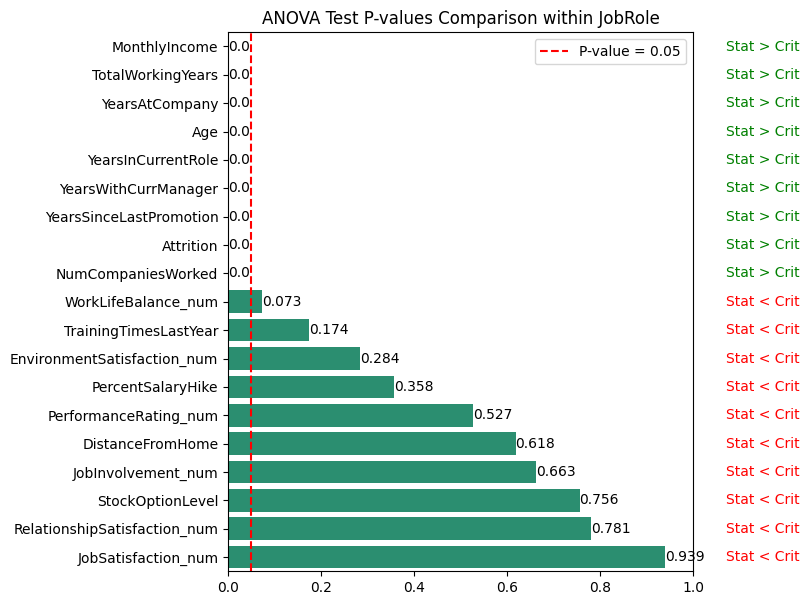

In [123]:
job_role_anova_all = anova_all('JobRole')
plot_p_values_with_stat(
    job_role_anova_all[2], 
    job_role_anova_all[0], 
    job_role_anova_all[1], 
    'ANOVA Test P-values Comparison within JobRole'
)

**JobLevel**

**do different job levels have a difference in numerical values**?

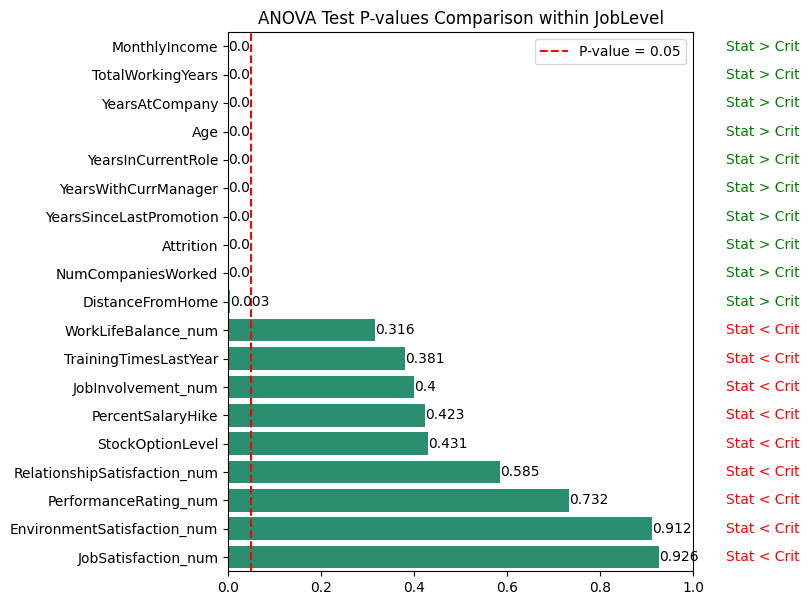

In [122]:
job_level_anova_all = anova_all('JobLevel')
plot_p_values_with_stat(
    job_level_anova_all[2], 
    job_level_anova_all[0], 
    job_level_anova_all[1], 
    'ANOVA Test P-values Comparison within JobLevel'
)

The test shows that there is a significant difference between different job roles/levels in values such as:
* Age   
* MonthlyIncome 
* NumCompaniesWorked   
* TotalWorkingYears 
* YearsAtCompany   
* YearsInCurrentRole  
* YearsSinceLastPromotion   
* YearsWithCurrManager 

One interesting thing is DistanceFromHome, it appeard to have an impact on JobLevel 

**MaritalStatus**

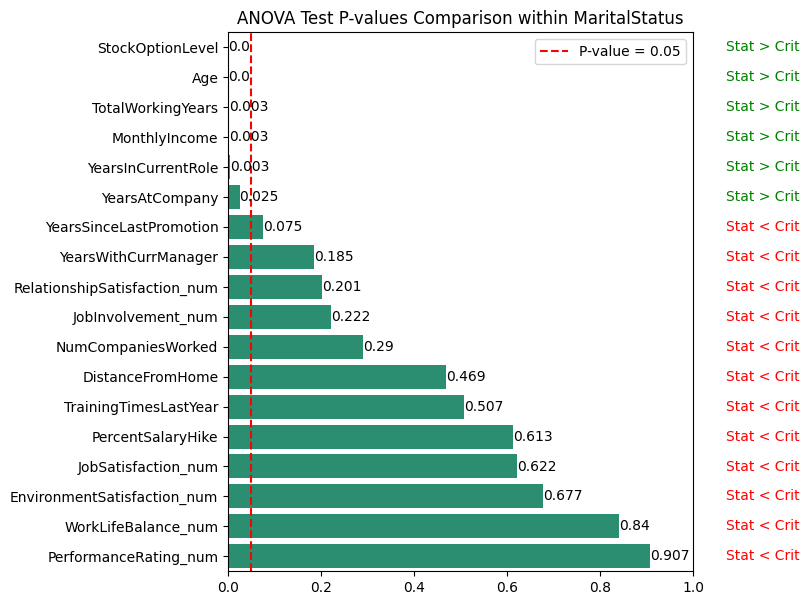

In [84]:
marital_status_anova_all = anova_all('MaritalStatus')
plot_p_values_with_stat(
    marital_status_anova_all[2], 
    marital_status_anova_all[0], 
    marital_status_anova_all[1], 
    'ANOVA Test P-values Comparison within MaritalStatus'
)

As work `MaritalStatus`, some initial thought sound obvious and reasonable: married employees most likely to be older, which leads to higher TotalWorkingYears, YearsInCurrentRole, YearsAtCompany, higher MonthlyIncome and StockOptionLevel 

**JobSatisfaction**

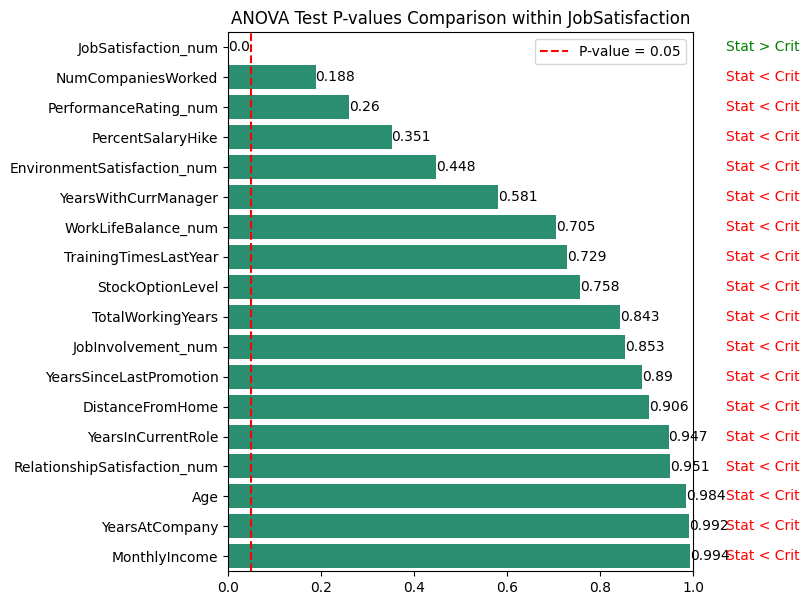

In [92]:
job_sat_status_anova_all = anova_all('JobSatisfaction')
plot_p_values_with_stat(
    job_sat_status_anova_all[2], 
    job_sat_status_anova_all[0], 
    job_sat_status_anova_all[1], 
    'ANOVA Test P-values Comparison within JobSatisfaction'
)

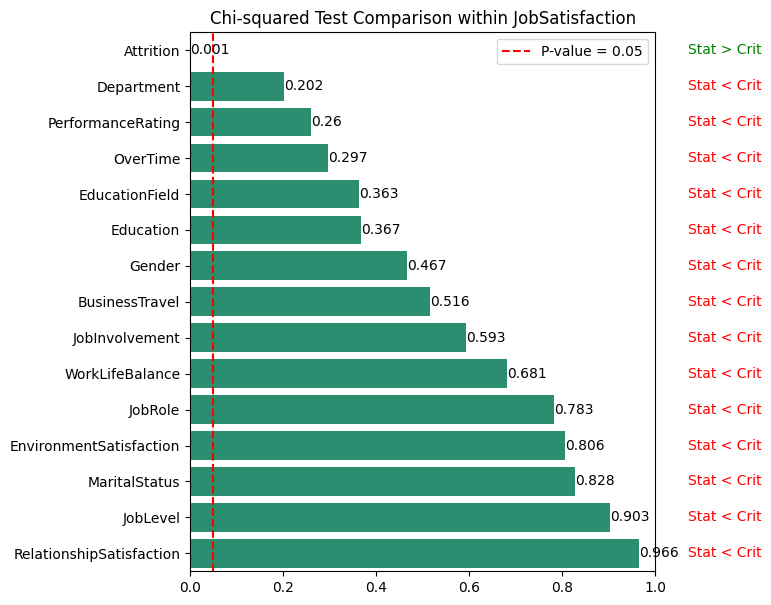

In [93]:
chi2_values_job_sat, chi2_crit_job_sat, chi2_p_val_job_sat  = chi_sqrd_all("JobSatisfaction")
plot_p_values_with_stat(chi2_p_val_job_sat, chi2_values_job_sat, chi2_crit_job_sat, "Chi-squared Test Comparison within JobSatisfaction")

**EnvironmentSatisfaction**

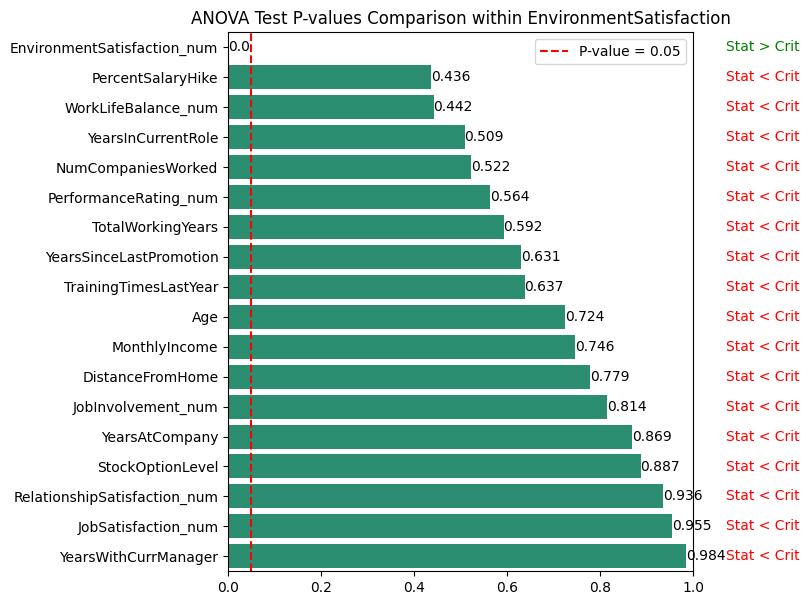

In [94]:
job_sat_status_anova_all = anova_all('EnvironmentSatisfaction')
plot_p_values_with_stat(
    job_sat_status_anova_all[2], 
    job_sat_status_anova_all[0], 
    job_sat_status_anova_all[1], 
    'ANOVA Test P-values Comparison within EnvironmentSatisfaction'
)

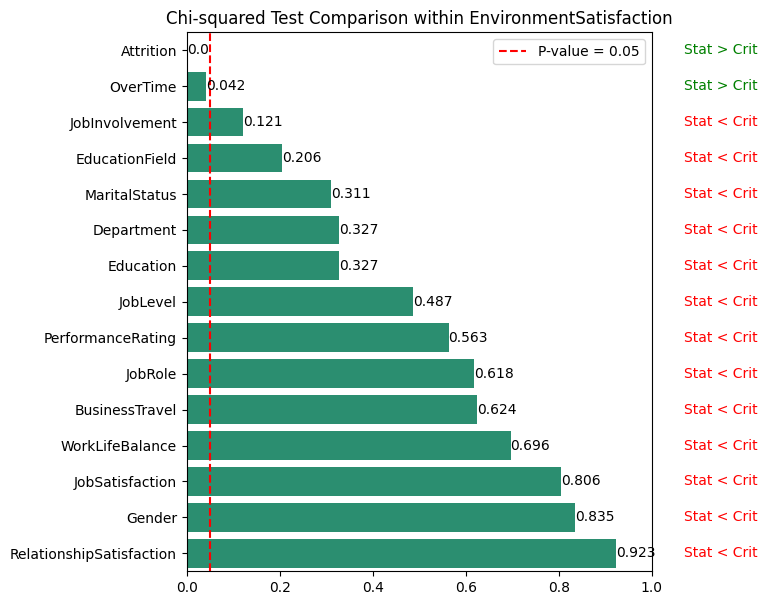

In [96]:
chi2_values_env_sat, chi2_crit_env_sat, chi2_p_val_env_sat  = chi_sqrd_all("EnvironmentSatisfaction")
plot_p_values_with_stat(chi2_p_val_env_sat, chi2_values_env_sat, chi2_crit_env_sat, "Chi-squared Test Comparison within EnvironmentSatisfaction")

**JobInvolvement**

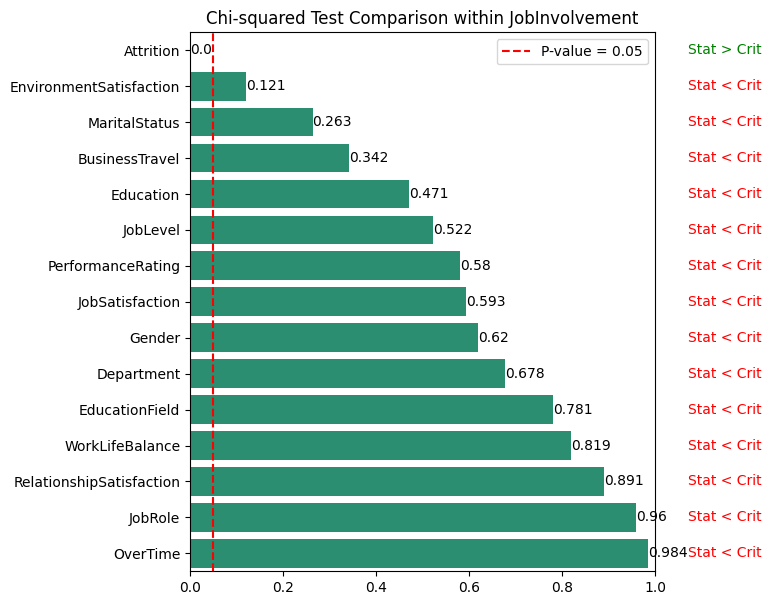

In [97]:
chi2_values_job_inv, chi2_crit_job_inv, chi2_p_val_job_inv  = chi_sqrd_all("JobInvolvement")
plot_p_values_with_stat(chi2_p_val_job_inv, chi2_values_job_inv, chi2_crit_job_inv, "Chi-squared Test Comparison within JobInvolvement")

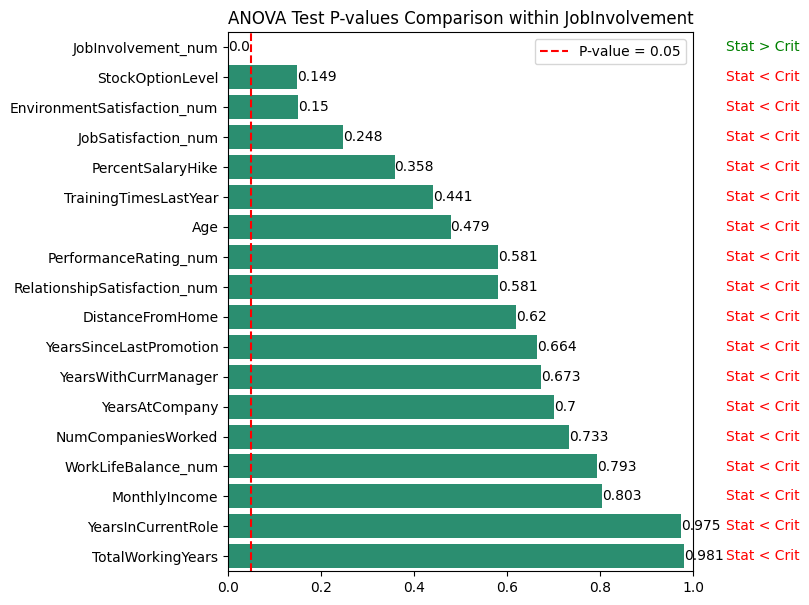

In [98]:
job_inv_status_anova_all = anova_all('JobInvolvement')
plot_p_values_with_stat(
    job_inv_status_anova_all[2], 
    job_inv_status_anova_all[0], 
    job_inv_status_anova_all[1], 
    'ANOVA Test P-values Comparison within JobInvolvement'
)

> **Categorical Feature Importance higlights the following:**
> * *BusinessTravel*, *Department*, *EducationField*, *EnvironmentSatisfaction*, *JobInvolvement*, *JobLevel*, *JobRole*, *JobSatisfaction*, *MaritalStatus*, *OverTime*, and *WorkLifeBalance* have **impact** on **Attrition**
> * **Department** is influenced by *MonthlyIncome* and *WorkLifeBalance*
> * **OverTime** has an impact on EnvironmentSatisfaction
> * **JobRole/JobLevel** are influenced by *Age*, *MonthlyIncome*, *NumCompaniesWorked*, *TotalWorkingYears*, *YearsAtCompany*, *YearsInCurrentRole*, *YearsSinceLastPromotion*, *YearsWithCurrManager*

#### **Numerical Features**

Let's check what numerical features impact Attrition

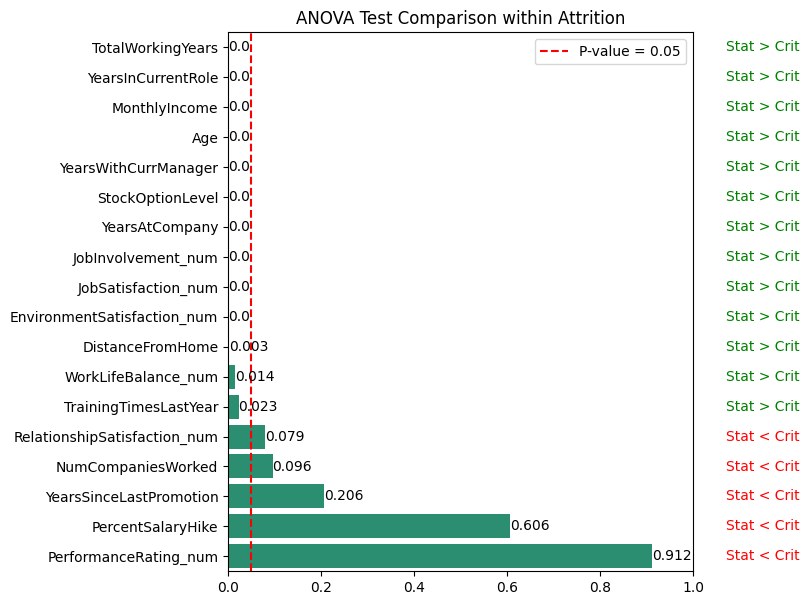

In [21]:
anova_values_attrit, anova_crit_attrit, anova_p_val_attrit = anova_all("Attrition")
plot_p_values_with_stat(anova_p_val_attrit, anova_values_attrit, anova_crit_attrit, "ANOVA Test Comparison within Attrition")

The time-related fields are obvious, new people tend to leave companies more than people who have worked there for a while. Anyways we should explore this part with Tableau as well.

Interesting features are `MonthlyIncome`, `JobInvolvment`, `JobSatisfaction`, `EnvritonmentSatisfaction`, `DistanceFromHome`, `WorkLifeBalance`, and `TrainingTimesLastYear`

**What categorical features depend on MontlyIncome?**

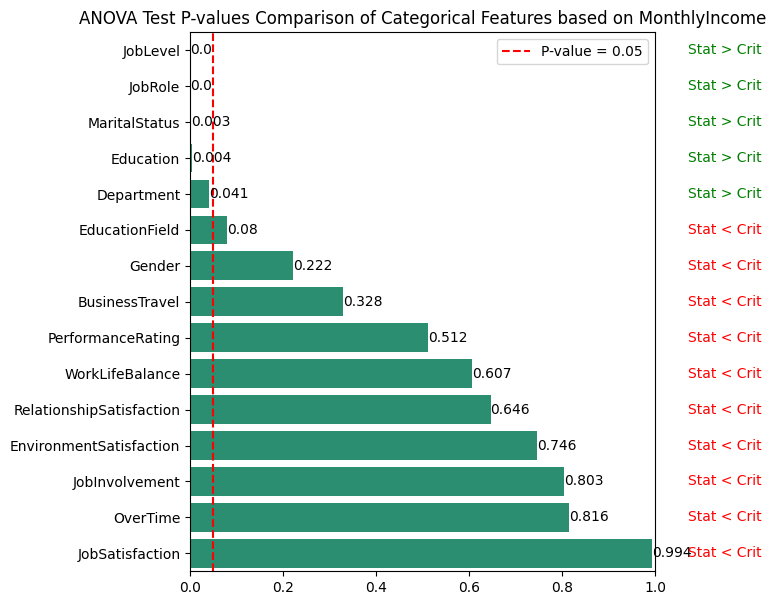

In [22]:
montly_income_anova_all = anova_all_for_num("MonthlyIncome")
plot_p_values_with_stat(
    montly_income_anova_all[2],
    montly_income_anova_all[0],
    montly_income_anova_all[1],
    'ANOVA Test P-values Comparison of Categorical Features based on MonthlyIncome'
)

ANOVA test results show that there is a difference in MonthlyIncome between different groups of `Department`, `Education`, `Job levels`, and `Job roles`. 

**MaritalStatus** is interesting, but one suggestion is that older people that have worked in the company for a while are married, but it does not mean that new people who are married get more money, so let's check this suggestion.

**Does Age impact MaritalStatus?**

In [51]:
marital_status_age_anova = anova("Age", "MaritalStatus")

(10.667282665673097, 3.001858137213299, 2.515485831299576e-05)

In [54]:
posthoc_marital_status_age_df = posthocs.posthoc_ttest(fi_hr_df, val_col="Age", group_col="MaritalStatus")
posthoc_marital_status_age_df[posthoc_marital_status_age_df < 0.05]

,Single,Married,Divorced
Single,NaN,0.000013,0.001113
Married,0.000013,NaN,NaN
Divorced,0.001113,NaN,NaN


ANOVA test and PostHoc T-test show us that **Age does have an impact** on `MaritalStatus`

**Let's check if MonthlyIncome impacts Education**

In [19]:
posthoc_monthly_income_edu_df = posthocs.posthoc_ttest(fi_hr_df, val_col="MonthlyIncome", group_col="Education")
posthoc_monthly_income_edu_df[posthoc_monthly_income_edu_df < 0.05]

,College,Below College,Master,Bachelor,Doctor
College,NaN,NaN,NaN,NaN,0.004617
Below College,NaN,NaN,0.004911,0.034695,0.000575
Master,NaN,0.004911,NaN,NaN,0.044843
Bachelor,NaN,0.034695,NaN,NaN,0.015714
Doctor,0.004617,0.000575,0.044843,0.015714,NaN


Doctors in general vary a lot in their monthly income in comparison with others

**DistanceFromHome**

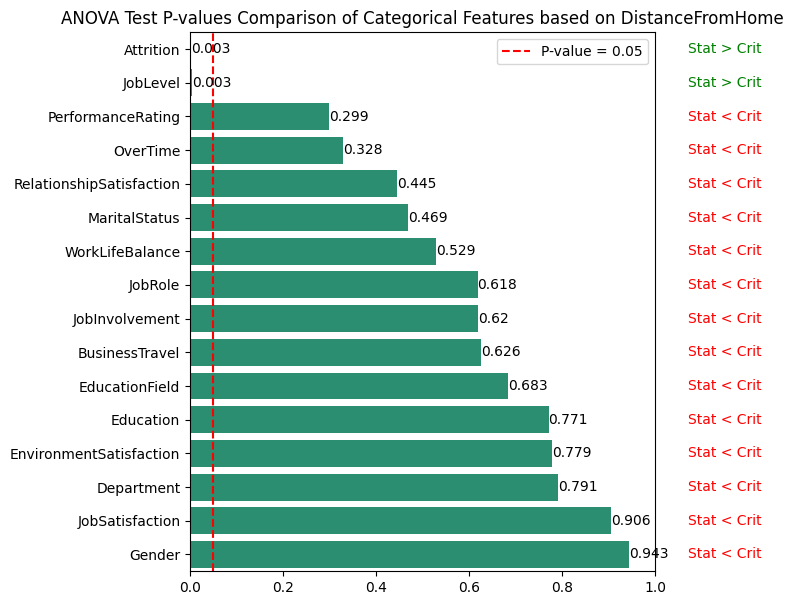

In [89]:
distance_home_anova_all = anova_all_for_num("DistanceFromHome")
plot_p_values_with_stat(
    distance_home_anova_all[2],
    distance_home_anova_all[0],
    distance_home_anova_all[1],
    'ANOVA Test P-values Comparison of Categorical Features based on DistanceFromHome'
)

We have already discovered this interesting relation between JobLevel and DistanceFromHome

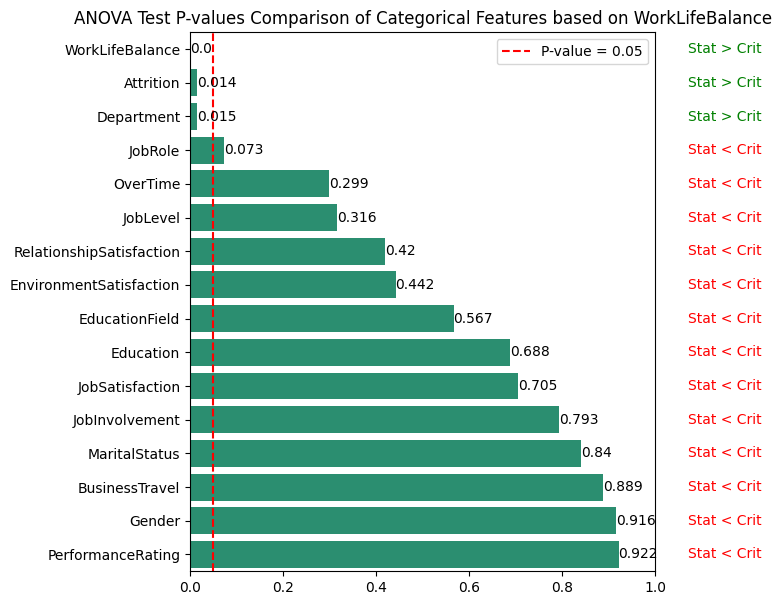

In [91]:
worklife_home_anova_all = anova_all_for_num("WorkLifeBalance_num")
plot_p_values_with_stat(
    worklife_home_anova_all[2],
    worklife_home_anova_all[0],
    worklife_home_anova_all[1],
    'ANOVA Test P-values Comparison of Categorical Features based on WorkLifeBalance'
)

**Is there a difference in ages of males and females?**

In [49]:
print("Overall Age/Gender", t_test("Age", "Gender"))
print("Quit Age/Gender", t_test("Age", "Gender", fi_hr_df[fi_hr_df['Attrition'] == 'Yes']))
print("Stayed Age/Gender", t_test("Age", "Gender", fi_hr_df[fi_hr_df['Attrition'] == 'No']))

Groups: ['Female' 'Male']
Overall Age/Gender (1.3921381802920636, 1.9615812836543436, 0.16409141231818586)
Groups: ['Female' 'Male']
Quit Age/Gender (-1.2513082727386975, 1.970110062267077, 0.21206624658075157)
Groups: ['Male' 'Female']
Stayed Age/Gender (-1.9450592962806397, 1.9618929575441109, 0.05199528816776108)


No difference between Gender and Age

> **Numerical Feature Importance higlights:**
> * *MonthlyIncome*, *DistanceFromHome*, *WorkLifeBalance*, and *TrainingTimesLastYear* **impact** on **Attrition**
> * *Time-related features* are highly correlated and even if one impacts on **Attrition**, all other do as well, except *TrainingTimesLastYear*

### Feature Importance Takeaway

The following features affect **Attrition**:

---

**Categorical Features:**
* BusinessTravel
* Department 
* EducationField
* EnvironmentSatisfaction
* JobInvolvement
* JobLevel
* JobRole
* JobSatisfaction
* MaritalStatus
* OverTime
* WorkLifeBalance (has an impact from Department)

Little remarks:

`Department`: Differs in *MontlyIncome* and *WorkLifeBalance*; Sales and Research & Development have a significant difference. Also *JobRole/JobLevel* and *EducationField*

`OverTime`: Impacts on *EnvironmentSatisfaction*

`JobRole` and `JobLevel`: Are influenced by *Age*, *MonthlyIncome*, *NumCompaniesWorked*, *TotalWorkingYears*, *YearsAtCompany*, *YearsInCurrentRole*, *YearsSinceLastPromotion*, *YearsWithCurrManager*

`MaritalStatus`: Has an impact by *Age*

---

**Numerical Features:**  

Time-related: Age, TotalWorkingYears, YearsInCurrentRole, YearsWithCurrManager, StockOptionLevel, YearsAtCompany, **BUT** as the results of our correlation matrix show us that **all of them are highly correlated with each other**, which gives us an idea that even one of these features can represent the rest of those, and there is **a significant impact** on **Attrition** by time-related features

Other important features are:

* MonthlyIncome (impacts on JobLevel, JobRole, MaritalStatus, Education, and Department)
* DistanceFromHome (has an impact on JobRole)
* TrainingTimesLastYear
